# Module 6: Dimensionality Reduction

# Introduction

In this module, we will discuss the "curse of dimensionality," introduce concepts of dimensionality reduction, and learn the main methods to transform datasets to lower dimensions. Dimensionality reduction methods complement and offer an alternative approach to feature selection techniques covered in previous modules.

# Learning Outcomes

In this module, you will:

* Learn about the "the curse of dimensionality" and the importance of reducing the dimensionality of data sets 
* Become familiar with the main approaches for dimensionality reduction: projection and manifold learning
* Learn and practice the main methods of reduction algorithms: Principal Component Analysis (PCA), Locally Linear Embedding (LLE), and t-Distributed Stochastic Neighbour Embedding (t-SNE) as powerful dimensionality reduction techniques

# Reading and Resources

We invite you to further supplement this notebook with the following recommended texts:

- Géron, A. (2019). Chapter 8: Dimensionality Reduction in *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media. https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/


-  Bishop, C.M. (2006). Chapter 12 in _Pattern Recognition and Machine Learning._ Springer. https://www.microsoft.com/en-us/research/publication/pattern-recognition-machine-learning/


-  James, G., Witten, D., Hastie, T., Tibshirani, R. (2013). Chapters 6: Linear Model Selection and Regularization and 10.2: Principal Components Analysis in _An Introduction to Statistical Learning._


- Witten, I.H., Frank, E. (2005). Chapter 7: Transformations: Engineering the input and output in _Data Mining: Practical Machine Learning Tools and Techniques (3nd Edition)._ https://www.elsevier.com/books/data-mining-practical-machine-learning-tools-and-techniques/witten/978-0-12-374856-0

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-6:-Dimensionality-Reduction" data-toc-modified-id="Module-6:-Dimensionality-Reduction">Module 6: Dimensionality Reduction</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Reading-and-Resources" data-toc-modified-id="Reading-and-Resources">Reading and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#The-Curse-of-Dimensionality" data-toc-modified-id="The-Curse-of-Dimensionality">The Curse of Dimensionality</a></span>
</li>
<li><span><a href="#The-Reason-for-Dimensionality-Reduction" data-toc-modified-id="The-Reason-for-Dimensionality-Reduction">The Reason for Dimensionality Reduction</a></span>
</li>
<li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)">Principal Component Analysis (PCA)</a></span>
<ul class="toc-item">
<li><span><a href="#An-image-compression-example" data-toc-modified-id="An-image-compression-example">An image compression example</a></span>
</li>
</ul>
</li>
<li><span><a href="#Application-of-Dimensionality-Reduction-for-Unsupervised-Learning:-the-t-SNE-method" data-toc-modified-id="Application-of-Dimensionality-Reduction-for-Unsupervised-Learning:-the-t-SNE-method">Application of Dimensionality Reduction for Unsupervised Learning: the t-SNE method</a></span>
</li>
<li><span><a href="#The-Mathematical-Formulation-of-PCA" data-toc-modified-id="The-Mathematical-Formulation-of-PCA">The Mathematical Formulation of PCA</a></span>
<ul class="toc-item">
<li><span><a href="#Maximum-variance-formulation" data-toc-modified-id="Maximum-variance-formulation">Maximum variance formulation</a></span>
</li>
<li><span><a href="#Minimum-error-formulation" data-toc-modified-id="Minimum-error-formulation">Minimum-error formulation</a></span>
</li>
</ul>
</li>
<li><span><a href="#Projecting-Down-to-d-Dimensions" data-toc-modified-id="Projecting-Down-to-d-Dimensions">Projecting Down to d Dimensions</a></span>
</li>
<li><span><a href="#Choosing-the-right-number-of-dimensions" data-toc-modified-id="Choosing-the-right-number-of-dimensions">Choosing the right number of dimensions</a></span>
</li>
<li><span><a href="#Locally-Linear-Embedding-(LLE)-manifold-learning" data-toc-modified-id="Locally-Linear-Embedding-(LLE)-manifold-learning">Locally Linear Embedding (LLE) manifold learning</a></span>
</li>
<li><span><a href="#Kernel-PCA" data-toc-modified-id="Kernel-PCA">Kernel PCA</a></span>
<ul class="toc-item">
<li><span><a href="#Selecting-a-kernel-and-tuning-hyperparameters" data-toc-modified-id="Selecting-a-kernel-and-tuning-hyperparameters">Selecting a kernel and tuning hyperparameters</a></span>
</li>
</ul>
</li>
<li><span><a href="#Other-Dimensionality-Reduction-techniques" data-toc-modified-id="Other-Dimensionality-Reduction-techniques">Other Dimensionality Reduction techniques</a></span>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# The Curse of Dimensionality

Successful data mining involves far more then selecting a learning algorithm and running it over your data. For one thing many machine learning algorithms have various hyperparameters and suitable values must be chosen for these. For example, decision trees can be pruned or unpruned. In the *k*-Nearest Neighbors (kNN) method of instance-based learning, a value for *k* will have to be chosen. The right choice for hyperparameters depend on the data itself.

In practical applications, we often have to deal with many features (predictors) in the datasets. You can think of each feature as being a dimension of a space.  That means that most of the time we are working with data in a high-dimensional space.

There are several challenges working with high-dimensional spaces. There is the technical issue of the machine learning algorithm running slow if the number of variables is large. But there are some more fundamental problems with high-dimensional spaces.

First of all, the problem with a large number of variables is that we would need an exponentially large number of training data examples. Consider that in order for the kNN algorithm to do a good job of classification, each instance must have enough neighbors that are sufficiently nearby to allow it to determine what the right class label should be for the region of data space around the point we're trying to classify. In 1- or 2-dimensional spaces it is usually not a problem. These spaces are usually populated with a sufficiently high density of examples. In 3-dimensions though the distances between the example points gets larger. If we divide 3-D space into small cells, many cells might be barely populated with examples. In n-dimensional space the distances grow exponentially fast. The volume of an n-dimensional object is of the order of $l^D$, where $l$ is a linear size of an object. Even if two points have very small differences in coordinates $x_i$ and $x_i + \delta x_i$ in many-dimensional space they will be located far from each other. This large distance will make it extremely difficult to perform classification or regression tasks well.

Another issue, which is a bit counter-intuitive and difficult to imagine, is that in many-dimensional space all points tend to be located in a very thin layer near the surface of a sphere. In Bishop (2006), the density of an n-dimensional sphere is considered. If we consider a sphere of radius $r=1$ in a space of $N$ dimensions, the volume of the sphere is $V_N(r)= K_N r^N$. Now let's find the fraction of volume between $r=1$ and $r= 1- \epsilon$: $\frac{V_N(1) - V_N(1- \epsilon)}{V_N(1)}$. This fraction would be equal to $1 - (1 - \epsilon)^N$. For small $N$ this fraction is close to zero, but when $N$ is $20$ or larger this fraction tends to $1$ even for small values of $\epsilon$. This means that the density of points near the origin (which is where we would expect test points that we wanted to classify to typically lie, not at the extreme edges) will be low resulting in poor classifier performance.

The difficulties that can arise in many-dimensional space are referred to as the _curse of dimensionality._ 

Examples:

- **Almost similar points**: Imagine 3 points in N-dimensional space. Point 1 and 2 have a very small difference in each feature. Point 3 has the exact same values in all features except one, but the difference is significant. In a small-d space the distance between points 1 and 2 would be negligible, but in many-dimensional space the distance between point 1 and 2 will be very large, since the small differences $\delta x_i$ in each dimension will accumulate to a large value in N-dimensional space. This will make the classification task very problematic.


- **Almost equal distances**: As it was discussed before for stable linear models (regression or classification) the number of features should be much smaller than the number of observations. If the dataset has almost as many features as observations the points become so dispersed that they become nearly equidistant (the distance between any two points is almost the same). In this case no stable prediction model can be built.

# The Reason for Dimensionality Reduction

In the regression and classification problems we have considered previously, we saw that feature selection is an important consideration. Dimensionality reduction is another approach. By reducing the number of dimensions quite often we find that it is much simpler to find a solution in the lower dimensional space. It might be the case after dropping some of the dimensions that the classification problem can be solved linearly. Moreover, a solution found in the space with lower dimensions might be accurate enough. In situations like this we usually have one or more excessive predictors in the dataset. These predictors are ones that are either not really predictive at all (i.e. what we are trying to predict is not functionally dependent on the feature) or are highly correlated with other predictors and so provide little additional predictive information beyond what other features already provide.

What we do in dimensionality reduction is construct new features, built from existing features such that the number of features is reduced, but in such a way as to minimize the loss of information contained in our original set of features.  So this serves a similar purpose to feature selection by hand, but is automatic and preserves the information content of the original dataset better than throwing entire features out completely.

# Principal Component Analysis (PCA)

The first technique we will consider is called **Principal Component Analysis** (PCA). PCA is the most popular dimensionality reduction technique. It finds the hyperplane that lies closest to the data and then projects the data point onto that hyperplane.  Let's look at how we apply it to regression problems.  

In previous chapters we saw that the model fit for regression (and for classification as well) can often be improved either by feature selection or by regularization of its coefficients. These methods were applied while using the raw features (or predictors) of the dataset. PCA is the most-used technique for transformation of predictors to an improved set that the regression algorithm can be applied to. 

Let's construct $M$ new variables $Z_1, Z_2,...,Z_M$ for $p$ predictors as linear combinations of the original $p$ predictors. So each $Z_m$ can be represented as a linear combination of the original variables $X_i$:


$$Z_m = \sum_{j=1}^{p}\phi_{jm}X_j$$


with some constants $\phi_{1m}, \phi_{2m}, ..., \phi_{pm}$.

Then, a linear model fit can be applied to the transformed variables and will have the form:


$$y_i = \theta_0 + \sum_{m=1}^{M}\theta_mz_{im} + \epsilon_i$$

For the right transformation (choice of the coefficients $\phi_{1m}, \phi_{2m}, ..., \phi_{pm}$) the dimensionality reduction approach can often outperform a standard least squares regression. The term _dimensionality reduction_ comes from the fact that this approach reduces the problem of estimating the $p+1$ coefficients $\beta_0, \beta_1, ..., \beta_p$ to the simpler problem of estimating the $M+1$ coefficients $\theta_0, \theta_1, ..., \theta_M$, where $M < p$. The dimension of our regression fit problem was reduced from $p+1$ to $M+1$.

All dimension reduction methods work in two steps. First the transformed predictors $Z_1, Z_2,...,Z_M$ are obtained. Second, the model is fit using these predictors.

There are different ways to find $Z_1, Z_2,...,Z_M$. For now we are considering the _principal components_ method.

If we choose two dimensions $(x_1, x_2)$ from our dataset and plot a two-dimensional scatter plot we might see that a new axis $z_1$ can be found such that it would be in the direction with maximum data variance, then the perpendicular axis $z_2$ will be the axis with the least data variance. We would then choose $z_1$ as the first principal component direction of the data if that is the direction along which the observations vary the most. If we _projected_ the data observations onto the first component the projected observations would have the largest possible variance. Projection on the perpendicular $z_2$ direction would preserve very little variance and if we choose any direction between $z_1$ and $z_2$ the projection onto it would preserve an intermediate amount of variance.

Mathematically the new variable $Z_1$ can be expressed as follows:


$$Z_1= \phi_{11}(x_1 - \bar{x}_1) + \phi_{12}(x_2 - \bar{x}_2)$$


where the coefficients $\phi_{11}$ and $\phi_{12}$ define the new direction and $\bar{x}_1$ and $\bar{x}_2$ are the mean values of the variables $x_1$ and $x_2$. From all possible combinations of the coefficients $\phi_{11}$ and $\phi_{12}$ we choose the values that yield the highest or maximized variance $Var(\phi_{11}(x_1 - \bar{x}_1) + \phi_{12}(x_2 - \bar{x}_2))$.

The first principal component can also be described as the one that is as close as possible to the data, which can be seen in this plot of 2-d data with $x_1$ and $x_2$ as the axes.  The direction of $z_1$ (the larger vector, aiming up and to the right) was chosen such that the sum of squared distances from the line to each point is minimized. 

![](images/900px-GaussianScatterPCA.svg.png)
By Nicoguaro - Own work, CC BY 4.0, https://commons.wikimedia.org/w/index.php?curid=46871195
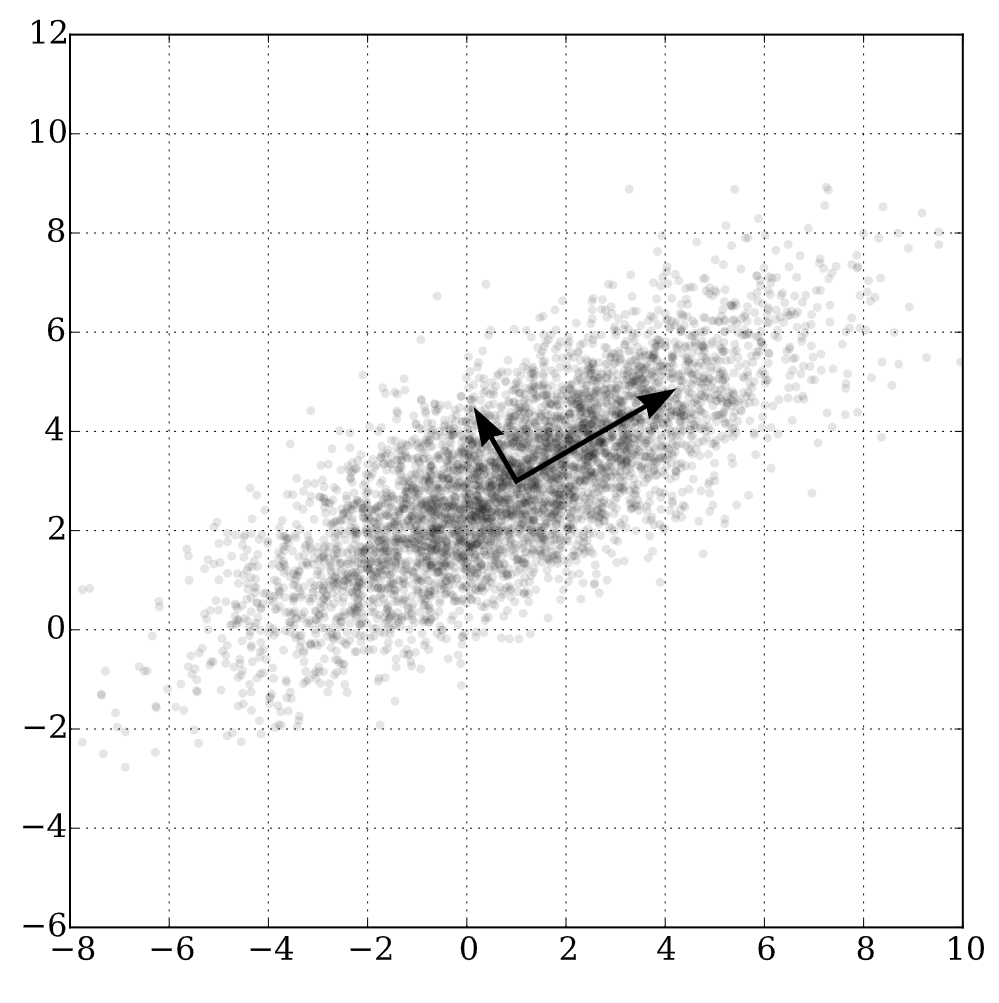

Also, note that projection onto the line defined by $z_1$ can be found by drawing a perpendicular from this line to each data point. But, since the line $Z_1$ lies as close to the original observations as possible, we may think of the values of the principal component $Z_1$ as single-number summaries of the two variables $x_1$ and $x_2$ for each observation. The plot shows a linear relationship between the first principal component and the two old predictors; the new component captures most of the information contained in the two predictors $x_1$ and $x_2$.  If our data had only two dimensions like in this plot, we could use this new predictor $Z_1$ instead of $x_1$ and $x_2$.  It combines most of the predictive power of $x_1$ and $x_2$ in a single variable rather than two.

To keep going and find the second principal component $Z_2$ we should find a linear combination of the other variables that is uncorrelated with $Z_1$, and has the second largest variance.  In the plot this is the smaller vector.  Repeating this process, the first $M$ principal components can be constructed as the new predictors. 

These new principal components are orthogonal to each other and, in general, they define an M-dimensional hyperplane in the p-dimensional space of our original $p$ predictors. The dimensionality of the dataset can be reduced down to $p$ dimensions by projecting data points onto the M-dimensional hyperplane.

In Python, the Scikit-Learn PCA class implements principal component analysis. For example, the following applies PCA to reduce the dimensionality of the dataset down to two dimensions. To demonstrate this we will use the Boston Housing dataset which contains information about the housing values in suburbs of Boston. This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_boston
boston=load_boston()

C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
# The description is attached to the data set:
# Uncomment the line below to find the Boston data set description

# print(boston.DESCR)

In [3]:
# Convert irt into a DataFrame

boston_df = pd.DataFrame(boston.data)

# Change the column names from index numbers to 'feature_names'
boston_df.columns=boston.feature_names

boston_feature_cols = [boston_df.columns]

# And add a column named 'PRICE' from boston.target

boston_df['PRICE'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# The correlation matrix is computed with `pandas.corr()` method

boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


The correlation matrix shows that not all features in this data set are highly correlated to the target variable `PRICE`. It means that there are some less important features.  There are also some features that are correlated with each other. Dimensionality reduction will help us build a smaller set of new orthogonal dimensions that preserve most of the predictive information.

**NOTE**: PCA should be applied to the features only. The target variable must be left out.

In [5]:
# Let's build an array of features only.
boston_feature_cols = [item for item in boston.feature_names]

from sklearn.decomposition import PCA

pca_2f = PCA(n_components=2)

boston2d = pca_2f.fit_transform(boston_df[boston_feature_cols])
pca_2f.components_

array([[ 2.92973218e-02, -4.35898000e-02,  2.83309382e-02,
        -5.55846350e-05,  4.49721818e-04, -1.16815860e-03,
         8.36335746e-02, -6.56163360e-03,  4.50053753e-02,
         9.49741169e-01,  5.60011721e-03, -2.91218514e-01,
         2.29433756e-02],
       [ 6.66847277e-03,  1.17564821e-03, -4.94975624e-03,
        -1.02678850e-04,  1.82069867e-06,  3.65750108e-04,
        -5.72246652e-03,  3.53685109e-04, -8.61865948e-03,
        -2.92406308e-01, -2.52898538e-03, -9.56180551e-01,
         5.76719865e-03]])

In [6]:
boston2d

array([[-119.81884272,   -5.56005586],
       [-168.89015548,   10.11620863],
       [-169.31170747,   14.0805323 ],
       ...,
       [-138.38716306,    0.9380922 ],
       [-137.50517338,    4.2518251 ],
       [-139.19033295,    1.00906423]])

Our two new principal components are linear combinations of the original features (`boston_feature_cols`). The PCA class method `components_` shows the coefficients in the linear combinations for $Z_1$ and $Z_2$. The method `explained_variance_ratio_` from the PCA class indicates the proportion of the dataset's variance that lies along the axis of each principal component. In this case 80.5% of the dataset's variance lies along the first axis and 16.3% lies along the second axis. Cumulatively these two axes explain over 96% of the dataset's variance.  We've gone from 14 dimensions to 2 and lost very little predictive power as a result!

In [7]:
pca_2f.explained_variance_ratio_

array([0.80582318, 0.16305197])

In [8]:
pca_2f_cum_var = np.cumsum(pca_2f.explained_variance_ratio_)
pca_2f_cum_var

array([0.80582318, 0.96887514])

Let's add the third principal component to see how much variance it can explain and what the cumulative explained ratio would be.

**Exercise 1**

Repeat the PCA analysis for the Boston house price dataset with 3, 4, 5 and 10 components. Find the explained variance ratio and cumulative explained variance in each case. 

In [9]:
# YOUR SOLUTION HERE

In [10]:
# YOUR SOLUTION HERE

In [11]:
# YOUR SOLUTION HERE

In [9]:
pca_3f = PCA(n_components=3)

boston3d = pca_3f.fit_transform(boston_df[boston_feature_cols])
pca_3f_cum_var = np.cumsum(pca_3f.explained_variance_ratio_)

print('Cumulative explained variation for 3 principal components: {}'.format(pca_3f_cum_var))

Cumulative explained variation for 3 principal components: [0.80582318 0.96887514 0.99022375]


In [11]:
pca_4f = PCA(n_components=4)

boston4d = pca_4f.fit_transform(boston_df[boston_feature_cols])
pca_4f_cum_var = np.cumsum(pca_4f.explained_variance_ratio_)

print('Cumulative explained variation for 3 principal components: {}'.format(pca_4f_cum_var))

Cumulative explained variation for 3 principal components: [0.80582318 0.96887514 0.99022375 0.99718074]


In [13]:
pca_10f = PCA(n_components=10)

boston10d = pca_10f.fit_transform(boston_df[boston_feature_cols])
pca_10f_cum_var = np.cumsum(pca_10f.explained_variance_ratio_)

print('Cumulative explained variation for 3 principal components: {}'.format(pca_10f_cum_var))

Cumulative explained variation for 3 principal components: [0.80582318 0.96887514 0.99022375 0.99718074 0.99848069 0.99920791
 0.99962696 0.9998755  0.99996089 0.9999917 ]


## An image compression example

The feature selection methods presented in the previous module are very useful and widely used for a dataset with 10-30 features. For the Boston house price datasets both feature selection and dimensionality reduction techniques can be successfully applied. One may argue that when there is not much collinearity in the dataset, feature selection is preferable as it does not introduce new dimensions and just helps to define the most important features in the dataset.

Dimensionality reduction becomes especially important when the number of features becomes very large. In the example below we will build an image classification model. In this problem we will classify apparel from just the images and use the Fashion MNIST dataset. The Fashion MNIST dataset consists of images of different types of apparel (t-shirts, pants, bags, shoes, etc). This kind of classification problem is common in e-commerce. The images of apparel in a catalog are often not categorized or the categorization provided by different brands are inconsistent. We want our prediction model to classify each image, so that similar products can be recommended to customers.

The dataset can be found here: https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-apparels/. It has a total of 70000 images and is split into the training set of 60000 images and the testing set of 10000 images. 

__NOTE:__ A zip file `fashion_train.zip` is included in the module files. After unziping the `fashion_train.zip` file you should have a folder "fashion_train" with a sub-folder "train" which contains 60000 apparel images in `.png` format and a `train.csv` file with the corresponding labels for each image. 

After reading in the image files we will convert the images into a `numpy` array for processing.

In [14]:
# In the following sections we shall process images with the 'OpenCV' computer Vision library.
# In particular, image files will be read with cv2 from that library.
# If you have not installed 'OpenCV' you may do so with the command 'conda install -c menpo opencv' or 'pip install opencv-python'

from glob import glob
import cv2

In [15]:
# Read the image files
images = [cv2.imread(file) for file in glob('fashion_train/train/*.png')]

# Convert images into numpy array:

images = np.array(images)
images.shape

(27234, 28, 28, 3)

As a result, we get a 3-dimensional array with 60,000 images, each of size 28 X 28 pixels.

Let's check that the import was successful by plotting some of the images from the training dataset:

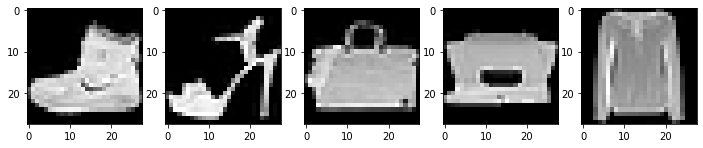

In [16]:
fig_fashion = plt.figure(figsize=(12, 12))

ax = fig_fashion.add_subplot(1,5,1)
ax.imshow(images[0], cmap='gray')

ax = fig_fashion.add_subplot(1,5,2)
ax.imshow(images[1], cmap='gray')

ax = fig_fashion.add_subplot(1,5,3)
ax.imshow(images[2], cmap='gray')

ax = fig_fashion.add_subplot(1,5,4)
ax.imshow(images[3], cmap='gray')

ax = fig_fashion.add_subplot(1,5,5)
ax.imshow(images[4], cmap='gray')

# plt.imshow(images[0], interpolation='none', cmap='gray')

Next, the 3-dimensional arrays need to be flattened to create 1-dimensional arrays.
To complete the preparation of the dataset we will upload the flattened images into a dataframe with the pixel values of every pixel present in each image and then a new column will be added to the dataframe with the corresponding label of each image. Labels are stored in the `train.csv` file.

In [18]:
image = []

for i in range (0, 27234):
    img = images[i].flatten()
    image.append(img)
    
image = np.array(image)
image.shape

(27234, 2352)

In [22]:
# Convert to the DataFrame and add the label column
#train_img = pd.read_csv('fashion_train/train.csv')

feat_cols = ['pixel' + str(i) for i in range(image.shape[1])]

image_df = pd.DataFrame(image, columns=feat_cols)

#image_df['label'] = train_img['label']
image_df.shape

(27234, 2352)

In [23]:
image_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# This shows that the DataFrame contains mostly zeroes.
# To check if we have any values and that no data was lost during its manipulation let's compute
# the sum of the values in each row

sum_img_rows = image_df.sum(axis=1)

# uncomment the line below to print result
# print(sum_img_rows)

In [25]:
# These numbers confirm that the dataset is not empty.
# On the other hand the numbers are not that big for a sum over 2,352 columns
# and indeed it suggests that the dataframe is sparse.

# Next, let's apply PCA to add a small number (4) of new predictors

pca_img = PCA(n_components=4)
pca_result = pca_img.fit_transform(image_df[feat_cols].values)

4 new variables might seem like an extremely low number for a dataset with 2,352 columns. To see if this is reasonable, let's find out how much variance is explained by the new variables:

In [26]:
print('Explained variation per principal component: {}'.format(pca_img.explained_variance_ratio_))

Explained variation per principal component: [0.28955724 0.17722013 0.0600467  0.05010103]


It shows that these 4 components explain around 60% of the variance in the dataset. The first component captured almost 30% of the variance, the second 17%, and so on. The fourth component is responsible for only 5% of the data variance. This suggests that if we were to add another, the fifth component, it would describe not more than 5% of the variance. Thus, the extra component would hardly improve the quality of the model at all. We can build the model with only 4 features and it should produce good enough predictions for our purpose while doing it fast.

# Application of Dimensionality Reduction for Unsupervised Learning: the t-SNE method

So far we have discussed PCA in the context of principal components regression or classification. For a dataset with a large number of correlated variables, principal components can be found to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the set. The principal component directions are directions in feature space along which the original data is highly variable. These principal components are then used as new predictors in the regression or classification model in place of the old ones. 

Principal Component Analysis is an unsupervised approach as it involves only a set of features $X_1, X_2, ..., X_p$ and no associated response $Y$. Even though there might be a target variable in the regression problem we are trying to solve, PCA does not differentiate variables as dependent and independent, and does not use the target variable.

Another dimensionality reduction technique is **t-Distributed Stochastic Neighbour Embedding** (t-SNE). This technique is particularly well suited for the visualization of high-dimensional datasets and is capable of finding non-linear patterns. It is a probabilistic technique.

In the original paper (L. van der Maarten, G. Hinton, Visualizing Data using t-SNE, *Journal of Machine Learning Research*, *9* (2008), pp. 2579-2605) the algorithm of t-SNE is described as: "t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions:

* a distribution that measures pairwise similarities of the input objects 
* and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding."

Essentially what this means is that it calculates the probability of _points similarity_ in high dimensions and in low dimensional space. The algorithm looks at how to best represent this data using fewer dimensions by matching both distributions. High-dimensional Euclidean distances between points $X_i$ are converted into conditional probabilities that represent similarities:


$$p_{j|i} = \frac{exp(-|x_i - x_j|^2/2\sigma_i^2)}{\sum_{k\neq i} exp(-|x_i - x_k|^2/2\sigma_i^2}$$


where $x_i$ and $x_j$ are data points, $|x_i - x_j|$ represents the Euclidean distance between these data points, and $\sigma_i$ is the variance of the data points in the original high-dimensional space.

In the low-dimensional space, data points $z_i$ and $z_j$ correspond to the high-dimensional points $x_i$ and $x_j$, and a similar conditional probability is computed:


$$q_{j|i} = \frac{exp(-|z_i - z_j|^2/2\sigma_i^2)}{\sum_{k\neq i} exp(-|z_i - z_k|^2/2\sigma_i^2}$$


In the new dimensions the variance was set to $\frac{1}{\sqrt{2}}$.

After calculating both probabilities, the algorithm finds new dimensions so that the difference between the probabilities is minimized.

The way it does this is computationally quite heavy and therefore there are some serious limitations to the use of this technique. For very high dimensional data you may need to apply another dimensionality reduction technique first before using t-SNE.

Let's demonstrate the t-SNE technique on the MNIST hand-written digits dataset.

<Figure size 432x288 with 0 Axes>

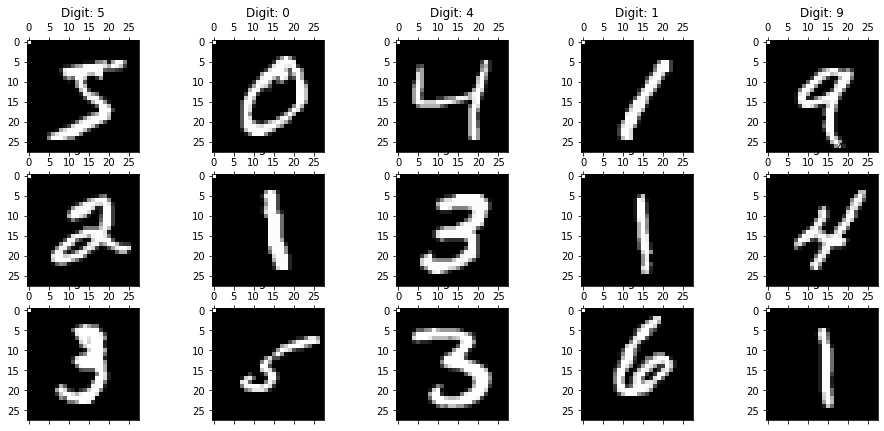

In [29]:
import time
from sklearn.datasets import fetch_openml

# Let's load the MNIST data

mnist = fetch_openml("mnist_784", version=1)
X = mnist.data / 255.0
y = mnist.target

feat_cols = [ 'pixel' + str(i) for i in range(X.shape[1]) ]

mnist_df = pd.DataFrame(X, columns=feat_cols)
mnist_df['y'] = y

mnist_df['label'] = mnist_df['y'].apply(lambda i: str(i))

X, y = None, None


# Generate 30 plots of randomly selected images

plt.gray()

fig= plt.figure(figsize=(16,7))

for i in range(0, 15):
    ax = fig.add_subplot(3,5, i+1, title="Digit: {}".format(str(mnist_df.loc[i, 'label'])))
    
    ax.matshow(mnist_df.loc[i, feat_cols].values.reshape((28,28)).astype(float))

plt.show()

Since t-SNE is so computationally intensive we will take only 10,000 rows from the MNIST dataset. It might take around 3 minutes to compute.

In [44]:
N=10000
mnist_df_subset = mnist_df.iloc[1:N, 1:].copy()
time_start = time.time()



In [47]:
# import TSNE from sklearn
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_result = tsne.fit_transform(mnist_df_subset[feat_cols[1:]].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9999 samples in 0.010s...
[t-SNE] Computed neighbors for 9999 samples in 3.170s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9999
[t-SNE] Computed conditional probabilities for sample 2000 / 9999
[t-SNE] Computed conditional probabilities for sample 3000 / 9999
[t-SNE] Computed conditional probabilities for sample 4000 / 9999
[t-SNE] Computed conditional probabilities for sample 5000 / 9999
[t-SNE] Computed conditional probabilities for sample 6000 / 9999
[t-SNE] Computed conditional probabilities for sample 7000 / 9999
[t-SNE] Computed conditional probabilities for sample 8000 / 9999
[t-SNE] Computed conditional probabilities for sample 9000 / 9999
[t-SNE] Computed conditional probabilities for sample 9999 / 9999
[t-SNE] Mean sigma: 2.137399
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.316582
[t-SNE] KL divergence after 300 iterations: 2.811459
t-SNE done! Time elapsed: 41.482339859

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

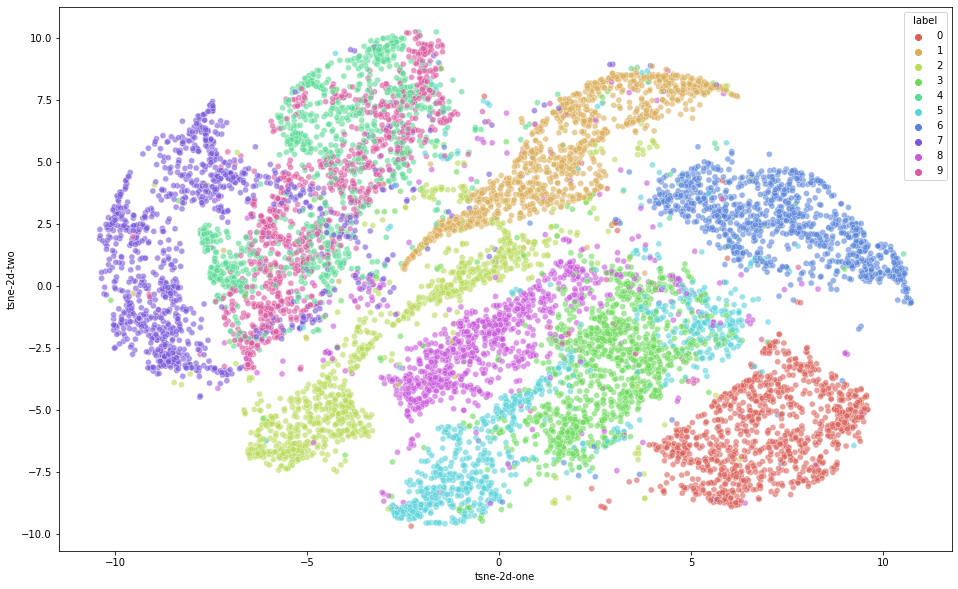

In [48]:
mnist_df_subset['tsne-2d-one'] = tsne_result[:, 0]
mnist_df_subset['tsne-2d-two'] = tsne_result[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)

As a result we get a visual presentation of the MNIST dataset with only two components. Moreover, it can be seen that the data is well-grouped into clusters.

To speed up the computation it is recommended first to reduce the dimensionality of the dataset by using PCA. Then you can apply t-SNE to the dataset with reduced dimensions.

**Exercise 2**

Use PCA to reduce the MNIST dataset's dimensionality to 50 components, then apply t-SNE to reduce further to two components. Compare the elapsed time and visualize the reduced datasets.

In [49]:
# YOUR SOLUTION HERE

In [50]:
# YOUR SOLUTION HERE

In [51]:
# YOUR SOLUTION HERE

In [52]:
# YOUR SOLUTION HERE

In [53]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(mnist_df_subset[feat_cols[1:]].values)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8282448976329442


In [54]:
# Now let's feed this PCA processed data into t-SNE

time_start_1 = time.time()

tsne_pca = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)

tsne_pca_result = tsne_pca.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'. format(time.time() - time_start_1))

C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 16.49223256111145 seconds


<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

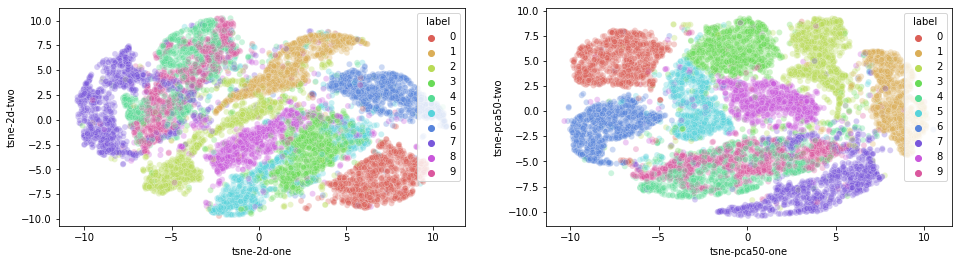

In [56]:
mnist_df_subset['tsne-pca50-one'] = tsne_pca_result[:,0]
mnist_df_subset['tsne-pca50-two'] = tsne_pca_result[:,1]

plt.figure(figsize=(16,4))


ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=mnist_df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax3 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=mnist_df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

# The Mathematical Formulation of PCA

There are two commonly used definitions of PCA. It can be defined as:

1. The projection of the data onto a lower dimensional linear space, such that the variance of the projected data is maximized.<br><br>

2. The linear projection that minimizes the average projection cost, defined as the mean squared distance between the data points and their projections.

## Maximum variance formulation

In this formulation the goal is to project the original data with dimensionality $D$ onto a space having dimensionality $M < D$ while maximizing the variance of the projected data. Assume that the new dimensionality $M$ is given. Let's start with considering the projection onto a one-dimensional space ($M = 1$), the direction of this space can be defined by a vector $u_1$. Projection of the data points $x_n$ is then given by $u_1^Tx_n$.

The mean value of the projected data is $u_1^T \bar{x_n}$ since vector $u_1$ is constant and $\bar{x}$ is given by:


$$\bar{x} = \frac{1}{N}\sum_{n=1}^{N}x_n$$


Then the variance of the projected data is given by:


$$\frac{1}{N} \sum_{n=1}^{N}{(u_1^Tx_n - u_1^T\bar{x})^2}$$


This expression can be re-written as:


$$u_1^T \frac{1}{N} \sum_{n=1}^{N}{(x_n - \bar{x})(x_n - \bar{x})^T}u_1$$


The sum expression between vectors $u_1^T$ and $u_1$ forms a data covariance matrix:


$$S = \frac{1}{N} \sum_{n=1}^{N}{(x_n - \bar{x})(x_n - \bar{x})^T}$$


and now the projected variance $u_1^TSu_1$ is minimized with respect to $u_1$. To ensure that the data variance is maximized we need to keep the vector $u_1$ constant. To enforce this constraint, the term $(1-u_1^Tu_1)$ is added and then the expression that is maximized is:


$$u_1^TSu_1 + \lambda_1(1-u_1^Tu_1)$$


In essence, the problem of finding the principal components is formulated as a problem of decomposition of the covariance matrix into a matrix of its eigenvalues and a matrix composed of its eigenvectors. The detailed solution is beyond the scope of this course. The variance will be maximum when the vector $u_1$ is set to the eigenvector of the matrix $S$ with the largest eigenvalue $\lambda_1$. This eigenvector will be the first principal component.

Additional principal components can be defined in an incremental fashion by choosing each new direction to be that which maximizes the projected variance amongst all possible directions orthogonal to those already considered. By an iterative process the new space of $M$ dimensions is built, defined by the $M$ eigenvectors $u_1, ..., u_M$ of the data covariance matrix $S$ corresponding to the $M$ largest eigenvalues $\lambda_1, ..., \lambda_M$.

See Golub, G. H. and C. F. Van Loan (1996) _Matrix Computations_ (3rd ed.). Johns Hopkins University Press.

## Minimum-error formulation

This is an alternative formulation of finding principal components in a lower dimensional space, which produces the same result as the above maximum-variance formulation. In this formulation the focus is on the  projection error. A complete set of basis vectors ${u_i}$ is introduced. Completeness of the set allows for representing each point from the dataset as a linear combination of the basis vectors:


$$x_n = \sum_{i=1}^{D}\alpha_{ni}u_i$$


where the coefficients $\alpha_{ni}$ define different data points $x_n$ in D-dimensional space. This is a simple transformation of the existing space and corresponds to a rotation of the coordinate system to a new system defined by the ${u_i}$. As the result of this transformation the original D components ${x_n1, ..., x_nD}$ are replaced by the new coordinates ${\alpha_n1, ..., \alpha_nD}$ in the coordinate system defined by ${u_i}$.
Taking the inner product with $u_j$, coefficients can be found as $\alpha_nj = x_n^Tu_j$ and data points $x_n$ can be presented in the form:


$$x_n = \sum_{i=1}^{D}(x_n^Tu_i)u_i$$


Next, we need to find the representation of the data points using a restricted number of variables $M < D$, which will be a projection onto a lower dimensional subspace. For this we approximate each data point $x_n$ by the first M basis vectors:


$$\tilde{x_n} = \sum_{i=1}^{M}z_{ni}u_i + \sum_{i=M+1}^{D}b_iu_i$$


where the ${z_{ni}}$ depend on the data point and the ${b_i}$ are constants that are the same for all data points. The algorithm must find the ${u_i}, {z_{ni}}, {b_i}$ that minimize the distortion introduced by the reduction in dimensionality from $D$ to $M$. As the measure of distortion, we will use the squared distance of the original data point $x_n$ and its approximation $\tilde{x_n}$ averaged over the whole data set.


$$J = \frac{1}{N}\sum_{n=1}^{N}|x_n - \tilde{x_n}|^2$$

Computationally, PCA is based on the training set matrix $X$ decomposition. There is a standard matrix factorization technique for this: **Singular Value Decomposition (SVD)**. This procedure factorizes the training matrix $X$ into the matrix multiplication of three matrices $U \Sigma V^T$. The last matrix $V$ contains all the principal components; the principal components ${c_i}$ make up the columns of the matrix $V$:

$$
V = \begin{pmatrix}
| & |&  & |\\
c_1 & c_2 & ... & c_M\\
| & | &  &|
\end{pmatrix}
$$
    
$\Sigma$ is the diagonal matrix of singular values. Think of __singular values__ as the importance values of different features in the matrix. The __rank__ of a matrix is a measure of the unique information stored in a matrix. The higher the rank the more information there is. The __eigenvectors__ of a matrix are the directions of maximum spread or variance of data.

What you are doing in dimensionality reduction is converting a high-rank matrix to a low-rank matrix while seeking to preserve the most important information it contains.

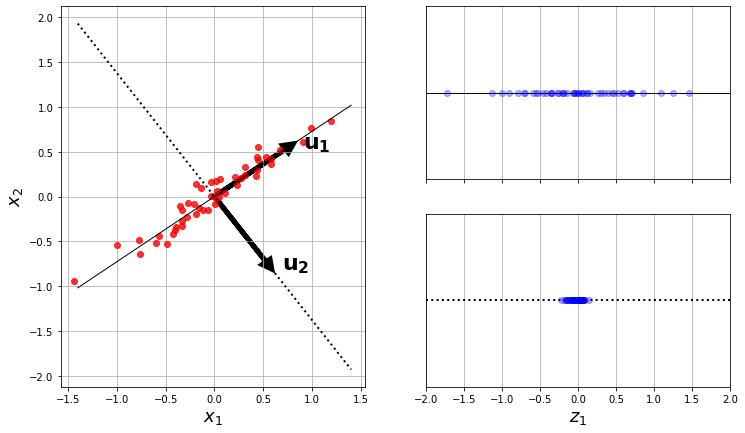

In [32]:
angle = np.pi /5

N=50

# Generate two-dimensional matrix of random points
np.random.seed(5)
X= np.random.randn(N, 2)/ 10

# Stretch the matrix in one-dimension and rotate by angle
X = X.dot(np.array([[6, 0], [0,1]]))
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])

# Generate vector u1 rotated by angle from horizonal and vector u3 perpendicular to u1 
u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

# Make projection of the data points onto u1 and u2 directions
X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(12, 7))
plt.subplot2grid((2,2), (0, 0), rowspan=2)
# Plot the data points
plt.plot(X[:, 0], X[:, 1], "ro", alpha=0.8)
# Plot the line along u1 direction
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
# Plot the line along u3 direction
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
# plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)

plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{u_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{u_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18)
plt.grid(True)

plt.subplot2grid((2,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(N), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((2,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(N), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

The `svd()` method is also implemented in the NumPy `linalg` sub-package.  We can use this NumPy method to demonstrate how SVD can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U$, $\Sigma$ and $V^T$.  The following code will use this method to find the principal components for a toy training set ($X$).

**NOTE**: PCA assumes that the dataset is centered around the origin. Scikit-Learn's PCA classes center the data as part of the algorithm. However, if other libraries are used you may need to center the data first.

In [33]:
# Center the dataset around the origin:
X_centered = X - X.mean(axis=0)

# SVD decomposition using NumPy svd() method
U, S, Vt = np.linalg.svd(X)

# Columns of the last of three matrices Vt are principal components vectors:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

# Print Principal Component vectors:

print(Vt)

[[-0.80295385 -0.5960412 ]
 [-0.5960412   0.80295385]]


# Projecting Down to d Dimensions

Now that the principal components have been identified, the next step is the projection of the data onto these principal vectors. Then, we can use the first $d$ components.

Projection of the training set onto the hyperplane can be computed by multiplying the training matrix $X$ and the matrix $W_d$, defined as the matrix containing the first $d$ principal components. If the matrix $Vt$ contains all principal components of the dataset (the number of columns is equal to the dimension of the original space or the number of features) the matrix $W_d$ represents the reduced space.  It is defined as the matrix containing only the first $d$ principal components (first $d$ columns of $V$). The projection can be defined as follows:


$$X_{d-proj} = X W_d$$

The following code projects the training set onto the plane defined by the first two principal components:

Text(0, 0.5, '$x_2$')

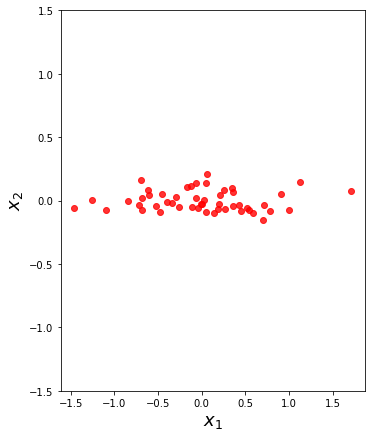

In [34]:
#This will select the first two columns from the V matrix
W2 = Vt.T[:, :2]

# and then the projection onto those two components

X2D = X_centered.dot(W2)

plt.figure(figsize=(12, 7))
plt.subplot2grid((2,2), (0, 0), rowspan=2)
plt.ylim(-1.5, 1.5)
# Plot the data points
plt.plot(X2D[:, 0], X2D[:, 1], "ro", alpha=0.8)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18)

This is the exact same space defined by vectors $\bar{c_1}$ and $\bar{c_2}$ as shown before. 

The Scikit-Learn PCA class implements methods for Principal Component Analysis using SVD decomposition. The following code applies PCA from Scikit-Learn to the same dataset (no need to center data this time):

In [35]:
from sklearn.decomposition import PCA

# Instantiate the object of PCA class
pca_toy = PCA(n_components= 2)

# Runnig the fit will perform the PCA decomposition 
X2D_pca = pca_toy.fit_transform(X)

# the principal components can be accessed as follows:

c_pca = pca_toy.components_

c_pca

array([[-0.80290638, -0.59610515],
       [-0.59610515,  0.80290638]])

# Choosing the right number of dimensions

Just like with the feature selection procedures described in the previous module, to optimize a predictive model we have to choose the right number of dimensions. We would like to choose the number of dimensions such that the explained variance is large enough for our application. 

The method `explained_variance_ratio_` of the PCA class returns the explained variance ratio. With this number we can easily compute the total explained variance in the chosen number of components. Below the explained variance by 1, 2 and 3 components for the Boston dataset is shown.

In [57]:
pca_1f = PCA(n_components=1)

boston1d = pca_1f.fit_transform(boston_df[boston_feature_cols])
pca_1f_cum_var = np.cumsum(pca_1f.explained_variance_ratio_)

print('Cummulative variance in 1 PC dimension {}'.format(pca_1f_cum_var))
print('Cummulative variance in 2 PC dimensions {}'.format(pca_2f_cum_var))
print('Cummulative variance in 3 PC dimensions {}'.format(pca_3f_cum_var))

Cummulative variance in 1 PC dimension [0.80582318]
Cummulative variance in 2 PC dimensions [0.80582318 0.96887514]
Cummulative variance in 3 PC dimensions [0.80582318 0.96887514 0.99022375]


Here we present a practical 3-step approach for finding the minimum number of dimensions required to preserve 95% of a training set's variance:

1. Compute the PCA without reducing dimensionality. It will produce a new space of the same number of dimensions as the original one.<br><br>

2. Compute the cumulative sum of the explained variance ratio for each PCA component.<br><br>

3. Find the index of the first item with a cumulative explained variance larger than 0.95. The required number of dimensions $d$ is that index plus 1.

In [58]:
pca = PCA()
pca.fit(boston_df[boston_feature_cols])

cumsum_ = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum_ >=0.95) + 1

print('The number of dimensions required to preserve 95% of boston data set variance is {}.'.format(d))

The number of dimensions required to preserve 95% of boston data set variance is 2.


There is another option for the Scikit-Learn PCA: instead of specifying the number of principal components, the number of components may be a fraction (between 0.0 an 1.0), and `n_components` can be set to the ratio of variance required to be preserved.

In [59]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(boston_df[boston_feature_cols])

print(X_reduced.shape)

(506, 2)


Alternatively, we can plot the explained variance as a function of the number of dimensions (plot of cumulative sum vs. number of dimensions). Such a plot will usually show an elbow in the curve, which indicates the number of dimensions where the explained variance stops growing fast. Looking at this curve helps to choose the number of dimensions. Here, we show how the number of dimensions for the Fashion MNIST training data set can be found.

In [60]:
pca_img_full = PCA()
pca_result = pca_img_full.fit_transform(image_df[feat_cols].values)

cumsum_img = np.cumsum(pca_img_full.explained_variance_ratio_)
d_img = np.argmax(cumsum_img >= 0.95) + 1

print('The number of dimensions required to preserve 95% of Fashion MNIST data set variance is {}.'.format(d_img))

The number of dimensions required to preserve 95% of Fashion MNIST data set variance is 62.


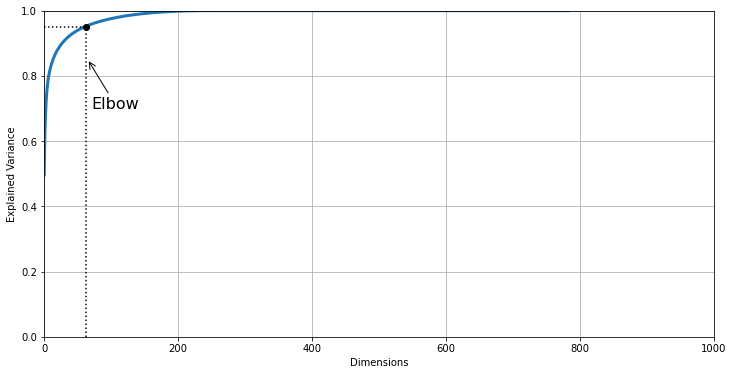

In [62]:

plt.figure(figsize=(12,6))
plt.plot(cumsum_img, linewidth=3)
plt.axis([0, 1000, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d_img, d_img], [0, 0.95], "k:")
plt.plot([0, d_img], [0.95, 0.95], "k:")
plt.plot(d_img, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

# Locally Linear Embedding (LLE) manifold learning

PCA is most suitable for datasets with true linear dependence. A technique called **Kernel PCA** was developed to extend application of PCA for non-linear reduction. **Locally Linear Embedding (LLE)** is another very powerful non-linear dimensionality reduction technique. It is representative of the **Manifold Learning** family of algorithms and does not rely on projections. 

The term **manifold** refers to shapes in hyper-dimensional space that aren't necessarily planes; they can be bent and twisted. The Swiss roll, shown below, is a well-known example of a 2D manifold. This is 2D shape that is bent in the 3D space. In general, a d-dimensional manifold is a part of an n-dimensional space (where $d < n$) that locally resembles a d-dimensional hyperplane. In the case of Swiss roll, $d = 2$ and $n = 3$; it locally resembles a 2D plane, but it is rolled into the third dimension.

The simple projection methods we've seen can't be used to capture the shape of a relationship that is a non-linear manifold, as they will squash different layers of the Swiss roll together. We need to unroll the manifold; usually the machine learning task can be easily solved in the $d$-dimensional space of the manifold where it is like a plane and not some other crazy shape.

Let's look more closely at LLE first, then we will come back to Kernal PCA. LLE algorithms may be described as two-step procedures:

* First, it measures how each training instance linearly relates to its closest neighbours, then
* it looks for a low-dimensional representation of the training set where these local relationships are best preserved.

This approach makes LLE very useful at unrolling twisted manifolds.

Below is code adapted from A. Geron "Hands-on Machine Learning with Scikit" that demonstrates usage of LLE to unroll the Swiss roll. The different colours of data points are ones that belong to different classes.  You can see that which class a point belongs to depends on where it is on the manifold.

In [63]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

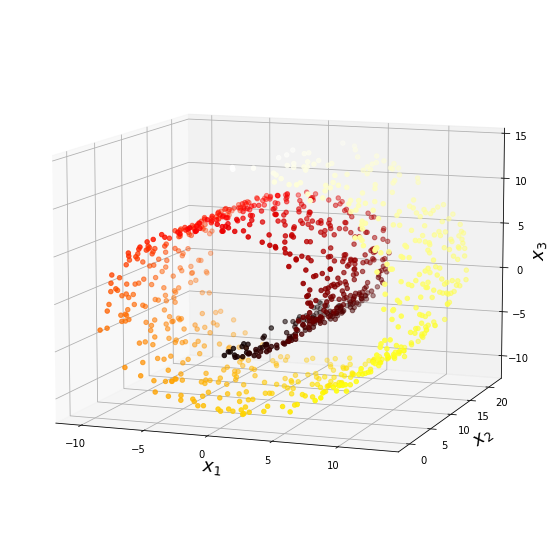

In [64]:
from mpl_toolkits.mplot3d import Axes3D

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])


plt.show()

# Plot of Swiss roll 2D manifold

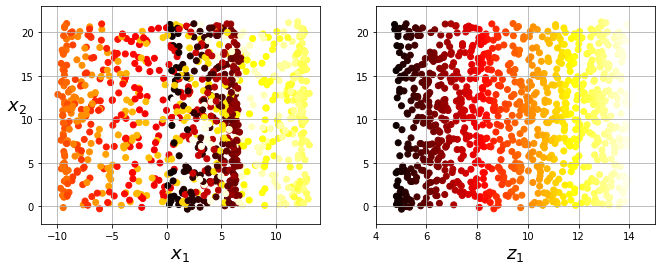

In [65]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)


plt.show()

The picture above demonstrates the projection of the Swiss roll onto a 2D plane (left) that PCE would do, and unrolling the manifold (right). One can see that the projection doesn't separate the points by class so is not useful for a classification task.  We want to use LLE to unroll the manifold for us (like we just did manually), separating the data by class as a result. Then we can use pretty much any classifier in our arsenal. You can see that kNN wouldn't work very well for the diagram on the left but would for the one on the right.

The following code snippet demonstrates using the LLE method.

In [66]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=41)
X_reduced_sr = lle.fit_transform(X)

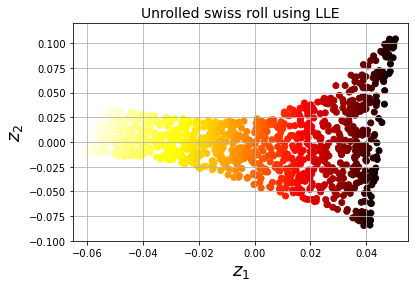

In [67]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced_sr[:, 0], X_reduced_sr[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

The figure above shows that LLE produced a two-dimensional dataset where the Swiss roll is now completely unrolled and the distances between data points are locally preserved. Even though interpoint distances were not preserved on a larger scale, the left part of the unrolled sheet is squeezed and the right part is stretched.  LLE modeled the manifold pretty well. This unrolled sheet may now be used for training a model.

To find a low-dimensional representation of a manifold LLE first identifies _k_ closest neighbours (in the example above `n_neighbors` set to 10) for each instance $x^{(i)}$ and analyses each instance locally trying to reconstruct $x^{(i)}$ as a linear function of its neighbours. Reconstruction consists of finding the weights $w_{ij}$ such that the squared distance between $x^{(i)}$ and $\sum_{j=1}^{m}w_{i,j}x^{(j)}$ is as small as possible. The result of this optimization step is the weight matrix $W$, constrained by normalization of weights for each instance $x^{(i)}$. The weight matrix $W$ encodes the local linear relationship between the training instances. 

Now the training instances are mapped into a low-dimensional space $d$ preserving these local relationships as much as possible. The image $z^{(i)}$ of $x^{(i)}$ in $d$-dimensional space is found such that the squared distance between $z^{(i)}$ and $\sum_{j=1}^{m}w_{i,j}x^{(j)}$ is as small as possible.

# Kernel PCA

We've seen that linear PCA is an efficient and robust technique which works very well if the relationships between predictors are linear. However, many datasets have real non-linear dependencies. We also know that for regression problems, polynomial regression allows for interactions (non-linearities) in the data by introducing polynomial features.

Another approach is the so-called **kernel trick**. This trick is used with many machine learning algorithms (in the next module it will be shown how it may be used for an SVM Classifier and Regressor) and can obtain the same result as if the polynomial features were added without actually adding them. The kernel trick is very efficient for classification problems because it maps instances into a high-dimensional space such that the decision boundary between classes becomes linear. You can think of it as warping the space the data is in so that the data flattens out.

Say we have a two-dimensional space $(x_1, x_2)$. We can use polynomial regression to apply a 2nd degree transformation that maps into a three-dimensional space with features $(x_1^2, \sqrt{2}x_1x_2, x_2^2)$. When the high-order polynomial transformation is applied the space becomes higher-dimensional, but the point is that in the transformed space the previous non-linear decision boundary is now linear.  We will call this space-warping function a **kernel**.  A polynomial kernel is only one alternative that is available to us.  There are a variety of kernels we can choose from.

The same trick may be applied to PCA to perform complex non-linear projections for dimensionality reduction. This is called **kernel PCA** (kPCA). It can be used for unrolling datasets that lie close to a twisted manifold. The KernelPCA class can be found in the `sklearn.decomposition` package. The implemented kernels include:

* `linear`
* `poly` (polynomial)
* `rbf` (radial basis function)
* `sigmoid`
* `cosine`
* `precomputed`

You can read more about each of them if interested at the `sklearn` website.

Below the `KernelPCA` is applied to the Swiss roll dataset, which is reduced to two dimensions using `linear`, `rbf`, and `sigmoid` kernels:

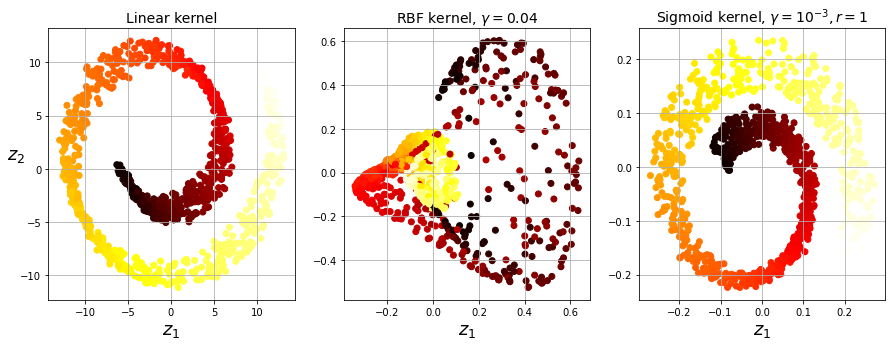

In [68]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1, fit_inverse_transform=True)

plt.figure(figsize=(15, 5))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

## Selecting a kernel and tuning hyperparameters

Like all other PCA methods KernelPCA is an unsupervised learning algorithm.  There is no obvious performance measure to use to tune the transformation so it selects the best kernel and hyperparameter values. Since dimensionality reduction is often a preparation step for a supervised learning task, grid search is often used to select the kernel and hyperparameters that lead to the best performance on that supervised task.

An approach that sometimes works is to select the kernel and hyperparameters that yield the lowest reconstruction error. However, the reconstruction of kPCA-transformed datasets is not as easy as with linear PCA. The problem is that after reconstruction we get a dataset in the kernel feature space, not in the original space. This reconstructed image is called the _pre-image_.  The distance to the original image can be measured and the kernel and hyperparameters that minimize this distance are selected.

# Other Dimensionality Reduction techniques

Many other dimensionality reduction techniques can be found in the machine learning literature. Several of them are implemented in Scikit-Learn. 

* We have already introduced above the **t-Distributed Stochastic Neighbour Embedding (t-SNE)** and applied it to image compression. This technique reduces dimensionality while trying to keep similar instances close and dissimilar ones apart. It is very useful for data visualization, and may help to visualize clusters of instances in a high-dimensional space.


* **Multidimensional Scaling (MDS)** is another local dimensionality reduction technique, which preserves the distances between the data points.


* **Isomap** is based on the analysis of nearest neighbours like LLE, but this time the graph connecting each instance to its nearest neighbours is created and then the dimensionality is reduced while trying to preserve the distances between nodes. It may be applied to twisted manifolds, and as result both local and large scale distances might be preserved.


* **Linear Discriminant Analysis (LDA)** is a classification algorithm, but it finds axes (or dimensions) that discriminate the classes most and these axes can be used to define hyperplanes onto which to project the data. This algorithm performs the projection which keeps different classes as far apart as possible.

**End of Module**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you
and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to
your instructor on the designated discussion board.

When you are comfortable with the content, you may proceed to the next module.

# References

Bishop, C.M. (2006) _Pattern Recognition and Machine Learning_. Springer. https://www.microsoft.com/en-us/research/publication/pattern-recognition-machine-learning/

James, G., Witten, D., Hastie, T., Tibshirani, R. (2017) _An Introduction to Statistical Learning_. Springer. https://www.springer.com/us/book/9781461471370

Golub, G. H. and C. F. Van Loan (1996) _Matrix Computations_ (3rd ed.). Johns Hopkins University Press.